<a href="https://colab.research.google.com/github/Aishwarya-hikare/Bike-Sharing-Demand-Prediction/blob/main/Team_Seoul_Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⬛ Project Name : Bike Sharing Demand Prediction**
## **▶ Project Type - Regression**
## **▶ Contribution - Team**
## **◼ Team Member 1 - Aishwarya Hikare**
## **◼ Team Member 2 - Sumit Kumar Mahato**

# **⬛ GitHub Link**

### **◼ Team Member 1 - Aishwarya Hikare**
### **▶ Link :**https://github.com/Aishwarya-hikare/Bike-Sharing-Demand-Prediction
### **◼ Team Member 2 - Sumit Kumar Mahato**
### **▶ Link :**https://github.com/sumit25chini/Bike-Sharing-Demand-Prediction

# ⬛ **Problem Statement**

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## ▶ **Data Description**


## **Attribute Information:**
### ♦ **Date** : year-month-day

### ♦ **Rented Bike count** : Count of bikes rented at each hour

### ♦ **Hour** : Hour of the day

### ♦ **Temperature** :Temperature in Celsius

### ♦ **Humidity** : %

### ♦ **Windspeed** : m/s

### ♦ **Visibility** : 10m

### ♦ **Dew point temperature** : Celsius

### ♦ **Solar radiation** : MJ/m2

### ♦ **Rainfall** : mm

### ♦ **Snowfall** : cm

### ♦ **Seasons** : Winter, Spring, Summer, Autumn

### ♦ **Holiday** : Holiday/No holiday

### ♦ **Functional Day** : NoFunction(Non Functional Hours), Function(Functional hours) 

# ⬛ **Import Libraries**

In [109]:
# let's import the libraries
import pandas as pd
import numpy as np
from numpy import math


from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


# ⬛ **Loading Dataset**

In [110]:
# Let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Load the  bike data set from drive
path = "/content/drive/MyDrive/SeoulBikeData.csv"
df=pd.read_csv(path,encoding = 'unicode_escape')

# ▶ **Understand More About The Dataset**

In [112]:
# Check the data of top  rows to take a glimps of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [113]:
# View the data of bottom rows 
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [114]:
# Get the shape of dataset with rows and columns
print(df.shape)

(8760, 14)


In [115]:
# Check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [116]:
# Print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [117]:
# Check the description of the dataset 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# ⬛ **Data** **Cleaning**

## ▶  **Missing values**



### ◼ The real-world data often has a lot of missing values. The cause of missing  values can be data corruption or failure to record data.

### ◼ The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values that's why we have to check missing values of dataset.


In [118]:
# check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## ▶ **Duplicate values**


### ◼ "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our dataset, Time and Money are saved by not sending identical communications multiple times to the same things.

In [119]:
# Check Duplicate Values of dataset
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)


The number of duplicate values in the data set is =  0


### ◼ In the above dataset after count the missing and duplicate value we came to know that there are no missing and duplicate value present in dataset.


# **⬛ Change The Column Name**

### ◼ Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results of dataset.

In [120]:
# Rename the complex columns name
df= df.rename(columns={'Rented Bike Count':'RENTED_BIKE_COUNT',
                                'Temperature(°C)':'TEMPERATURE',
                                'Humidity(%)':'HUMIDITY',
                                'Wind speed (m/s)':'WIND_SPEED',
                                'Visibility (10m)':'VISIBILITY',
                                'Dew point temperature(°C)':'DEW_POINT_TEMPERATURE',
                                'Solar Radiation (MJ/m2)':'SOLAR_RADIATION',
                                'Rainfall(mm)':'RAINFALL',
                                'Snowfall (cm)':'SNOWFALL',
                                'Functioning Day':'FUNCTIONING_DAY',
                                 'Date':'DATE',
                                  'Hour':'HOUR',
                                  'Seasons':'SEASONS',
                                  'Holiday':'HOLIDAY'})
                               
                                

# **Create New Columns**
###  In dataset "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into three column i.e 'year', 'month', 'day'as a category data type of dataset.

In [121]:
# Changing the "Date" column into three "year","month","day" column
df['DATE'] = df['DATE'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [122]:
# Create  new columns 
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day_name()

In [123]:
# Create a new column of "weekdays_weekend" 
df['WEEKDAYS_WEEKEND']= df['DAY'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [124]:
# Check the front rows of dataset
df.head()

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY,YEAR,MONTH,DAY,WEEKDAYS_WEEKEND
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


# ▶ **Change Data Type**


### ◼ As "Hour" , "month" , "weekdays_weekend" column are show as a integer data type but actually it is a category data type. so we need to change this data type if we not done this properly then, while doing the further anlysis and correleted of dataset then the values are not actually true so we can mislead by this.

In [125]:
# Change the int64 column into catagory column
cols=['HOUR','MONTH','WEEKDAYS_WEEKEND']
for col in cols:
  df[col]= df[col].astype('category')

In [126]:
# Let's check the result of data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   8760 non-null   datetime64[ns]
 1   RENTED_BIKE_COUNT      8760 non-null   int64         
 2   HOUR                   8760 non-null   category      
 3   TEMPERATURE            8760 non-null   float64       
 4   HUMIDITY               8760 non-null   int64         
 5   WIND_SPEED             8760 non-null   float64       
 6   VISIBILITY             8760 non-null   int64         
 7   DEW_POINT_TEMPERATURE  8760 non-null   float64       
 8   SOLAR_RADIATION        8760 non-null   float64       
 9   RAINFALL               8760 non-null   float64       
 10  SNOWFALL               8760 non-null   float64       
 11  SEASONS                8760 non-null   object        
 12  HOLIDAY                8760 non-null   object        
 13  FUN

# ⬛ **Data Visualization** **And Processing  On The Dataset**



### ▶  Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

## ⚫ **Exploring seasons Data**

In [127]:
# Data visualization on seasons column
df['SEASONS'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

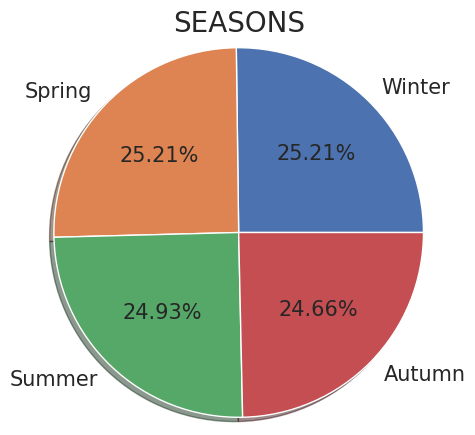

In [128]:
# Ploting pie chart for season
plt.subplots(figsize=(7,5))
plt.title("SEASONS", fontsize=20)
plt.pie(df['SEASONS'].value_counts(), labels = df.SEASONS.unique(), autopct='%.2f%%' ,shadow=True, radius=1.2, textprops = {"fontsize":15} )
plt.show()

## **◼ Observation**
### Pie charts are used to represent the proportional data or relative data in a single chart We plot piachart for visualize all type of Seasons are given in the Dataset.

### By the dataset we have four seasons which of Spring, Winter , Summer , Autumn and all of these have the almost similar values shows .

## ⚫ **Explore the weekdays_weekend vs Rented Bike Count Data**

Text(67.625, 0.5, 'Rented Bike Count')

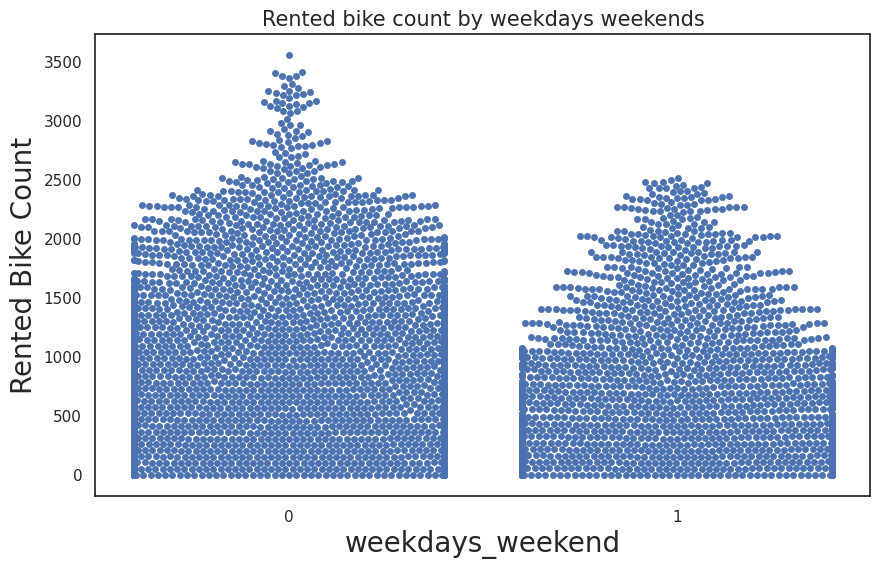

In [129]:
# Distribution plot weekdays_weekend vs Rented Bike Count
plt.figure(figsize=(10,6))
sns.set(style='white')
ax=sns.swarmplot(x='WEEKDAYS_WEEKEND', y='RENTED_BIKE_COUNT',data=df) 
ax.set_title('Rented bike count by weekdays weekends',fontsize=15)
ax.set_xlabel("weekdays_weekend",fontsize=20)
ax.set_ylabel("Rented Bike Count",fontsize=20)
     

## ◼ **Observation**

### A swarmplot shows all the data points and that helps to understand the distribution in a better manner. Swarmplot is being used to plot weekdays_weekend rented bikes.

### From the above figure it is clear that the weekdays has slightly more demand over the weekend it means peoples love to stay at home at weekend.

## **⚫ Explore the functioning days Data**

In [130]:
# Checking counts of functioning day
df['FUNCTIONING_DAY'].value_counts()

Yes    8465
No      295
Name: FUNCTIONING_DAY, dtype: int64

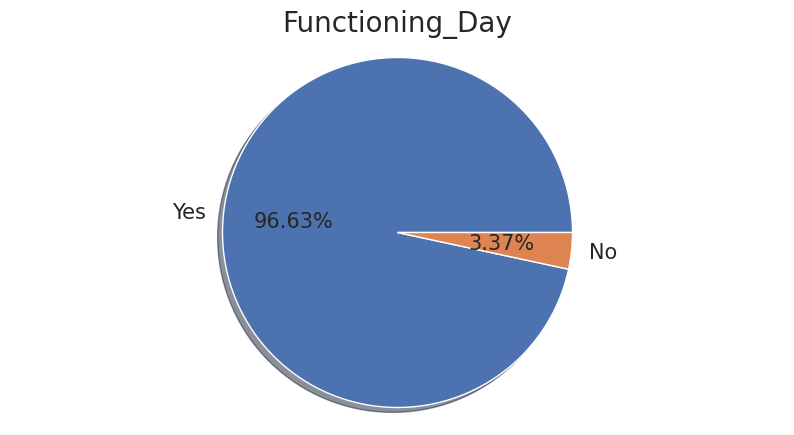

In [131]:
# Ploting pie chart for Function day
plt.subplots(figsize=(10,5))
plt.title("Functioning_Day", fontsize=20)
plt.pie(df['FUNCTIONING_DAY'].value_counts(), labels = df['FUNCTIONING_DAY'].unique(), autopct='%.2f%%' ,shadow=True,textprops = {"fontsize":15} ,radius = 1)
plt.axis('equal')
plt.show()

## ◼ **Observation**

### A pie chart helps organize and show data as a percentage of a whole. By the above piachart we clearly define that the Functioning days have 96.63%  and Non functioning days have 3.37% .

## **⚫ Explore the Rented Bike count over different seasons Data**

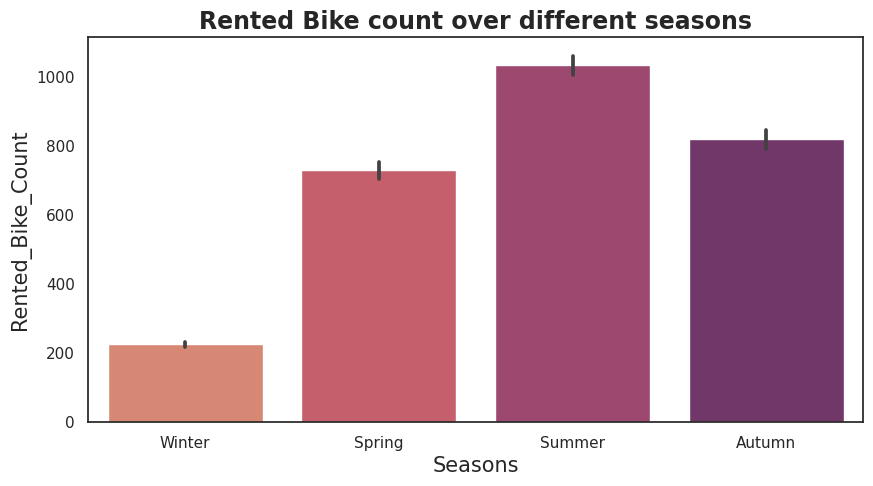

In [132]:
# Visulize Rented Bike Count Over Seasons column
plt.figure(figsize=(10,5))
plt.title('Rented Bike count over different seasons',fontweight = 'bold' ,fontsize = 17)
sns.barplot(data = df, x='SEASONS', y = 'RENTED_BIKE_COUNT', palette ='flare')
plt.xlabel('Seasons',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
plt.show()

## ◼ **Observation**
### The bar graph is used to compare the feature between different groups over time. From the above barplot we can say that Summer Season have higher numbers of bike demand similarly followed with Autumn Season and winter Season have lowest number of bike demand according to given dataset.
### In winter seasons most of the people prefer stay at home rather than go outside.

## **⚫ Explore The Rented Bike Count Over Different Months Data**

In [133]:
# Count unique values of dataset
df['MONTH'].unique()


[12, 1, 2, 3, 4, ..., 7, 8, 9, 10, 11]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [135]:
# Week and Month name of the dataset

df['DATE']=pd.to_datetime(df['DATE'])
df['DAY']=df['DATE'].dt.day_name()

df['MONTH']=df['DATE'].dt.month_name()
df['YEAR']=df['DATE'].dt.year


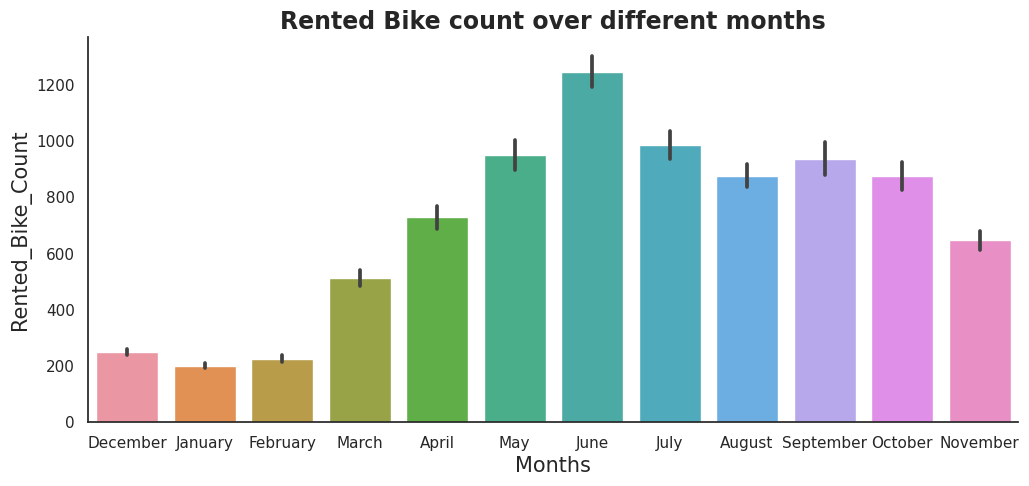

In [137]:
# Visualization of Bike Count Over Months
plt.figure(figsize=(12,5))
plt.title('Rented Bike count over different months', fontweight = 'bold' , fontsize= 17)
sns.barplot(data = df, x='MONTH', y = 'RENTED_BIKE_COUNT')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
sns.despine()
plt.show()

## ◼ **Observation**
### The bar graph is used to compare the feature between different groups over time. Here we plot the demand for rented bikes count over different month from given dataset.
### In dataset clearly we can say that month may , june , july , august , september , october have highest bike demand and december , january , february have lowest demand for rented bike .

## **⚫ Explore The Rented Bike Count Vs Different Days Data**

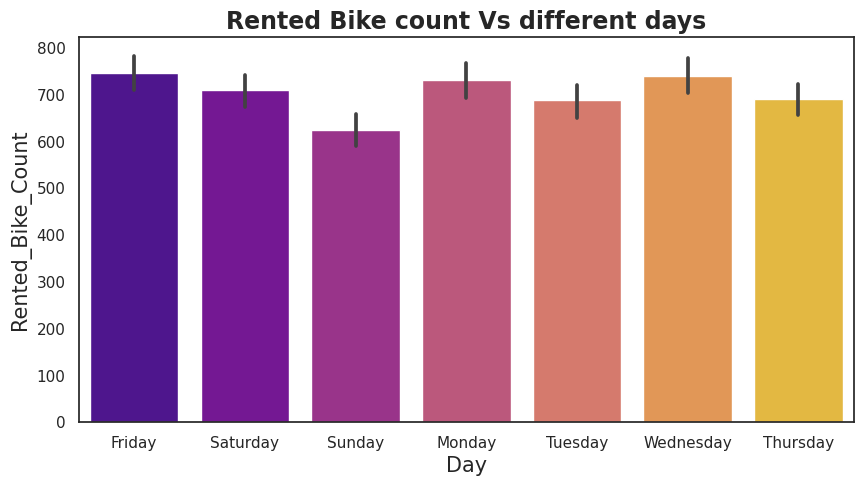

In [139]:
# Visualize the Bike Count Over DAYS
plt.figure(figsize=(10,5))
plt.title('Rented Bike count Vs different days',fontweight = 'bold' , fontsize = 17)
sns.barplot(data = df, x='DAY', y = 'RENTED_BIKE_COUNT', palette ='plasma')
plt.xlabel('Day',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
plt.show()

## ◼ **Observation**
### Bar graphs are used to measure the changes over a period of time. In this graph we plot the bike demand over the different days by the given dataset it's clear that sunday has least demand for rented bike over the different days and other days have the highest demand for rented bike compare to sunday.

## **⚫ Explore The Rented Bike Count Vs Hours Data**

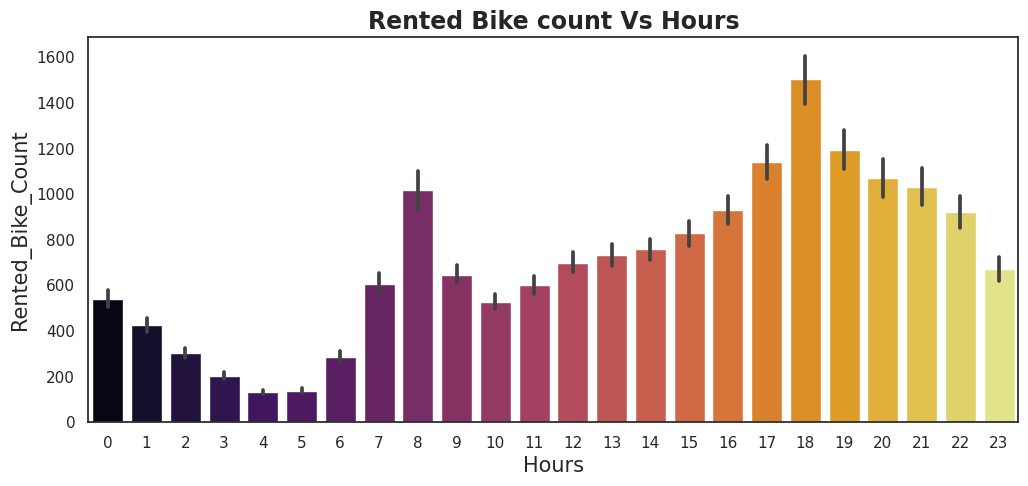

In [140]:
# Visulize Rented Bike Count Over Hours column
plt.figure(figsize=(12,5))
plt.title('Rented Bike count Vs Hours',fontweight = 'bold' , fontsize = 17)
sns.barplot(data = df, x='HOUR', y = 'RENTED_BIKE_COUNT', palette ='inferno')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
plt.show()

## ◼ **Observation**
### A Bar Graph is a graphical display of data using bars of different feature. From the above graph we can see that at the 7-9 am in the morning the demand of rented bikes is highest. It means people take bikes on rent to go to their office or workplace and the demand for rented bikes is highest between 4 - 10 pm. It means people take bikes on rent while returning to their homes from their office or workplaces to avoid heavy traffic.

## **⚫ Explore The Rented Bike Count Over Holidays Data**

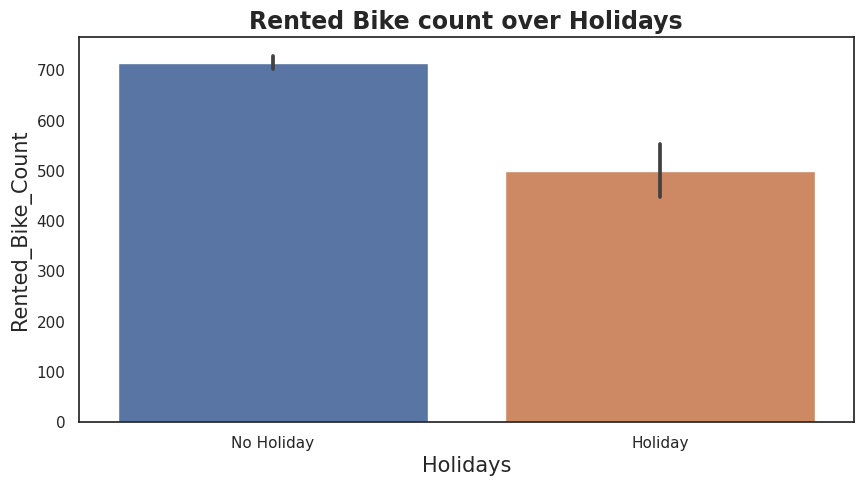

In [142]:
# Visualize Rented Bike Count Over Holidays columns
plt.figure(figsize=(10,5))
plt.title('Rented Bike count over Holidays',fontweight = 'bold' , fontsize = 17)
sns.barplot(data = df, x='HOLIDAY', y = 'RENTED_BIKE_COUNT', )
plt.xlabel('Holidays',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
plt.show()

## ◼  **Observation**
### A barplot is one of the most common types of graphic By the above graph clearly see that people rent bikes less in holiday days compare to non-holidays , people love to stay  at home and celebrate the festivals or holiday with  their family and friends.


## **⚫ Explore The Rented Bike Count Over Years Data**

In [144]:
# Check the value count of dataset
df['YEAR'].value_counts()

2018    8016
2017     744
Name: YEAR, dtype: int64

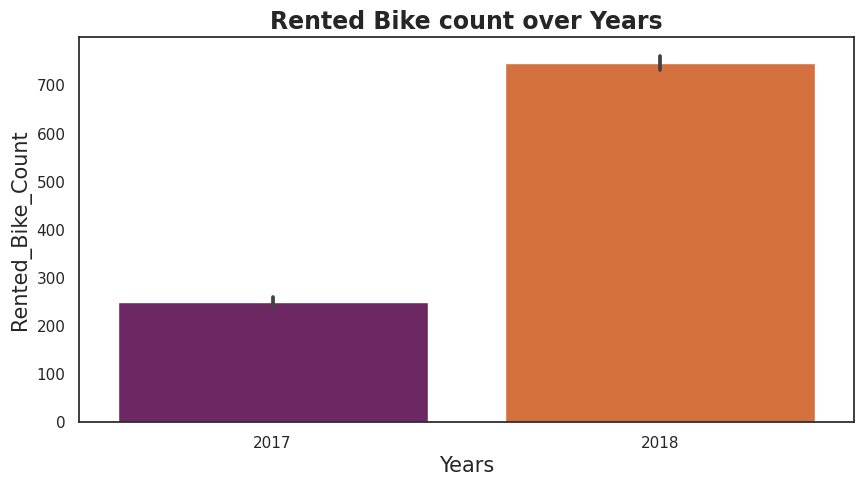

In [146]:
# Visulize Rented Bike Count Over Years columns
plt.figure(figsize=(10,5))
plt.title('Rented Bike count over Years',fontweight = 'bold' , fontsize = 17)
sns.barplot(data = df, x='YEAR', y = 'RENTED_BIKE_COUNT', palette ='inferno')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Rented_Bike_Count',fontsize=15)
plt.show()

## ◼ **Observation**
### The bar graph is used to compare the feature between different groups over period of time. From the given dataset in year 2017 demand for rented bikes have less demand and in year 2018 demand for the rented bikes increase rapidly within one year.


## **⚫ Explore The Rented Bike Count Over Temperature Data**

<Axes: xlabel='TEMPERATURE'>

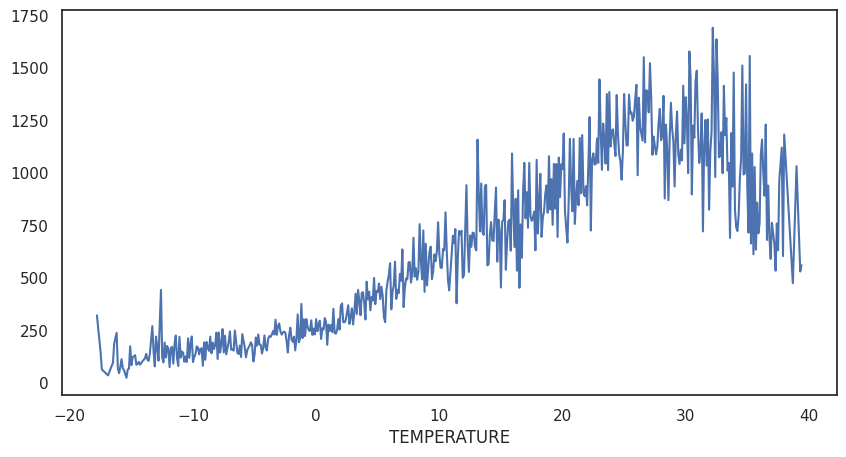

In [147]:
# Visulize Temp vs Rented bike columns
plt.figure(figsize=(10,5))
df.groupby('TEMPERATURE').mean()['RENTED_BIKE_COUNT'].plot()

## ◼ **Observation**
### By the following graph we can say that people prefer to take bike ride more often when the temperature is near about 20-30 degrees Celcius it means the people prefer to demand bike ride in summers as compare to other seasons.

## **⚫ Explore The Rented Bike Count,  Hour and Seasons Data**

<Axes: xlabel='HOUR', ylabel='RENTED_BIKE_COUNT'>

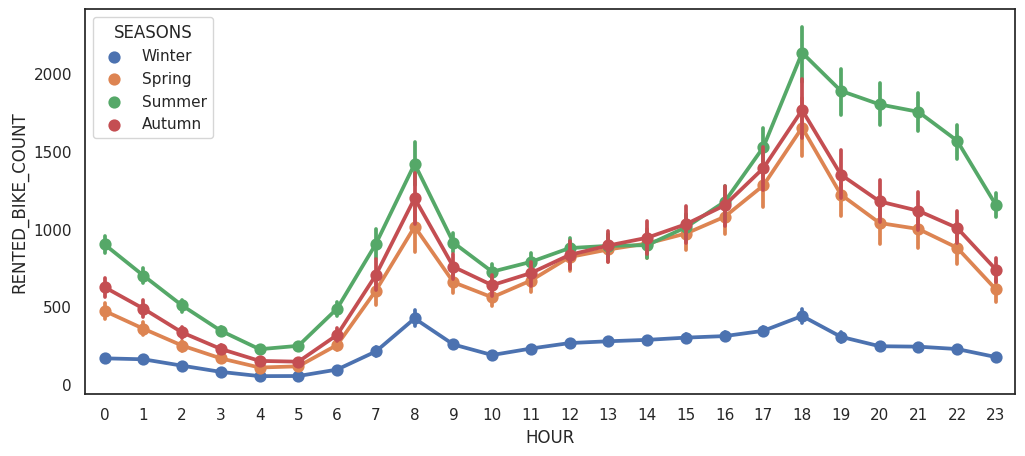

In [148]:
# Plot chart between bike rented according to  hour and seasons columns
plt.figure(figsize=(12,5))
sns.pointplot(data=df, x="HOUR", y='RENTED_BIKE_COUNT', hue='SEASONS')

## ◼ **Observation**
### A point plot uses scatter plot graphs to visualize features like point estimates and confidence intervals. In the above  point plot which shows the use of rented bike  in four different seasons, and it clearly shows that, In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-10pm and In winter season the use of rented bike is very low because of snowfall.

## **⚫ Explore The Rented Bike Count Over Month  and Weekdays_Weekend Data**

<Axes: xlabel='MONTH', ylabel='RENTED_BIKE_COUNT'>

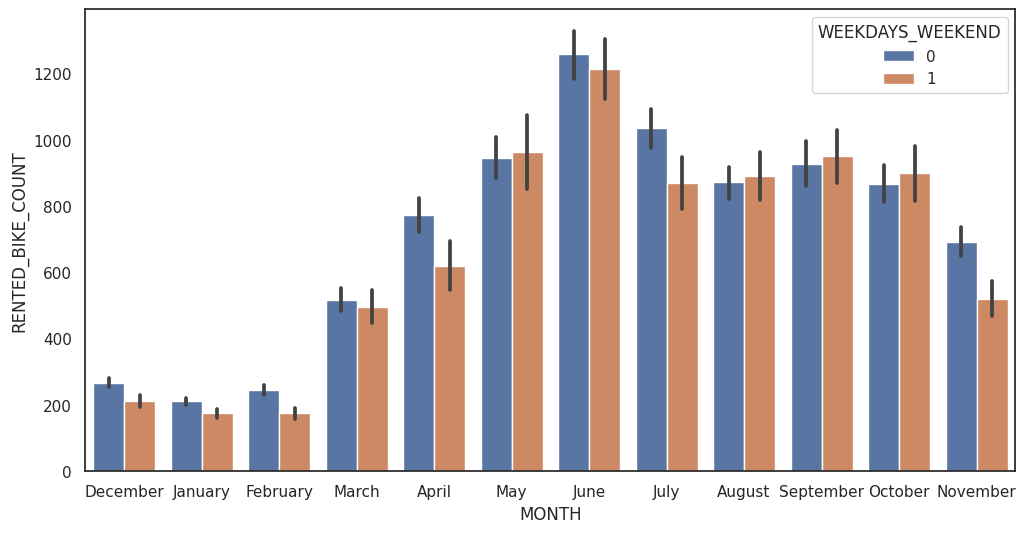

In [149]:
# Plot the graph between the HOUR and RENTED_BIKE_COUNT OVER WEEKDAYS_WEEKEND columns
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="MONTH", y='RENTED_BIKE_COUNT', hue='WEEKDAYS_WEEKEND')

## ◼ **Observation**
### The bar graph is used to compare the feature between different groups over period of time. From the given dataset we conclude that on weekdays the maximum demand for rented bike in  month of June similarly as on weekend also have maximum demand for bike rented in June and the minimun demand for rented bike both weekdays and weekend  is on the month of January. 

# ⚫ **Correlation Analysis between Multiple Columns**

In [150]:
# Check the Correlation of columns
df.corr()

,RENTED_BIKE_COUNT,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,YEAR
RENTED_BIKE_COUNT,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.215162
TEMPERATURE,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.377796
HUMIDITY,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.035925
WIND_SPEED,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.003781
VISIBILITY,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.052381
DEW_POINT_TEMPERATURE,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.336350
SOLAR_RADIATION,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.128086
RAINFALL,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.027522
SNOWFALL,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.206418
YEAR,0.215162,0.377796,0.035925,-0.003781,0.052381,0.336350,0.128086,0.027522,-0.206418,1.000000


<Axes: >

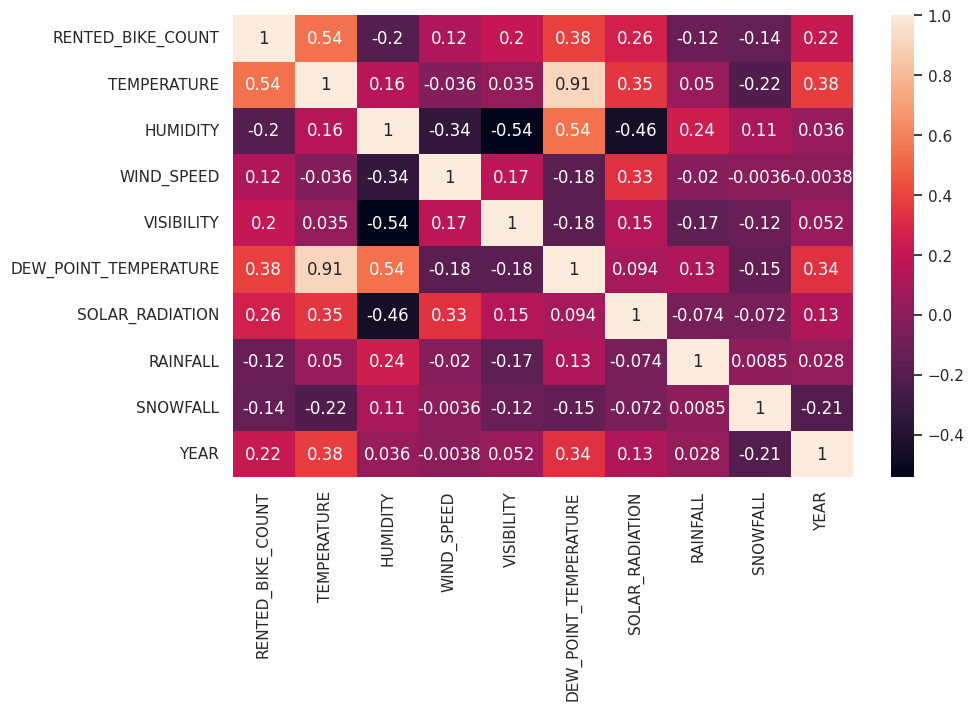

In [151]:
# Plot the Correlation graph
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## ◼ **Observation**
### By the above figure we can say that  heatmap displays the correlation between various features of the data set. The values next to the cells show the strength of the correlation between two features, with values closer to 1 indicating strong positive correlation, values close to -1 indicating strong negative correlation, and values closer to 0 indicating no correlation. Heat map shows Temperature and Dew point temperature is highly correlated.There is a highly negative correlation between wind speed and year.

In [152]:
# Check numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['RENTED_BIKE_COUNT', 'TEMPERATURE', 'HUMIDITY', 'WIND_SPEED',
       'VISIBILITY', 'DEW_POINT_TEMPERATURE', 'SOLAR_RADIATION', 'RAINFALL',
       'SNOWFALL', 'YEAR'],
      dtype='object')

In [153]:
# Create categorical column list
categorical_columns = list(set(df.columns) - set(numerical_features))
categorical_columns

['MONTH',
 'HOLIDAY',
 'FUNCTIONING_DAY',
 'WEEKDAYS_WEEKEND',
 'DATE',
 'SEASONS',
 'HOUR',
 'DAY']

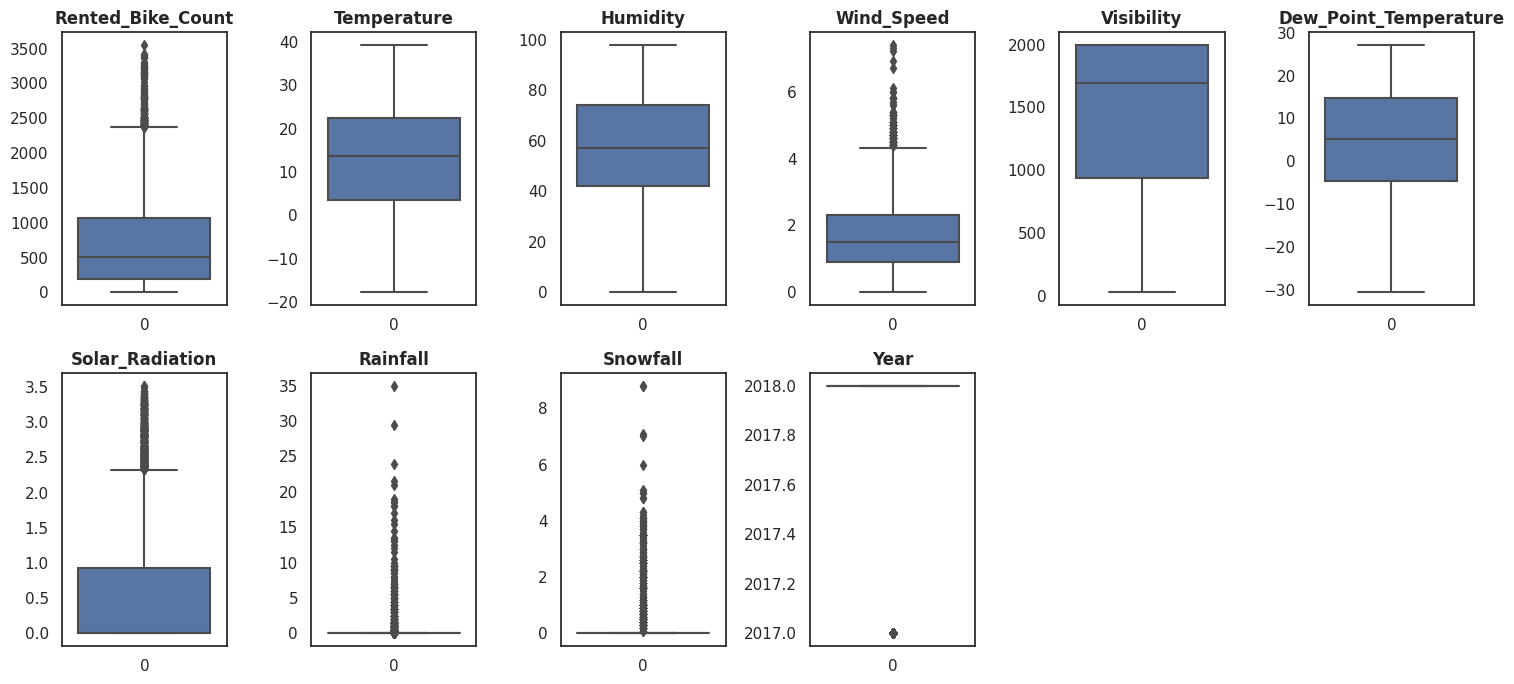

In [154]:
# Checking for outliers
plt.figure(figsize=(15,7))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### ◼ Dependent Variable (RENTED BIKE COUNT) containts outliers, we have to remove these outliers for Regression.

### ◼ Some Independent Variables like Rainfall, Snowfall, Windspeed and Solar Radiation these variables contain some outliers. From the distribution plots we have also seen that these variables have extreme skewed distribution, so removing/dropping the outliers from the data might result in significant data loss. Hence, we will keep all the values.

# **⬛ Regression plot**

### Regression analysis is a statistical method to model the relationship between dependent and independent variables with one or more independent variables. The change in dependent variable is associated with the change in the independent variables.It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.  More specifically, regression analysis helps us to understand how the value of the dependent variable changes corresponding to an independent variable when other independent variables are held fixed.

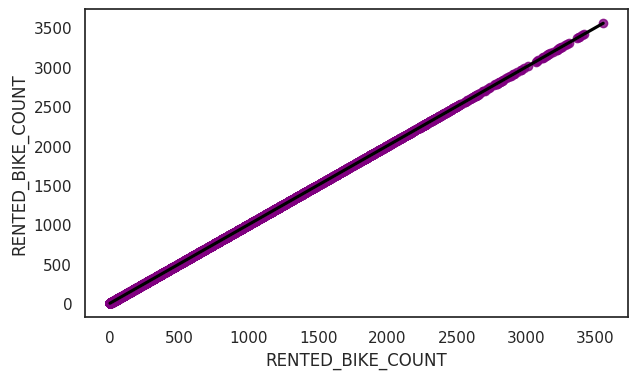

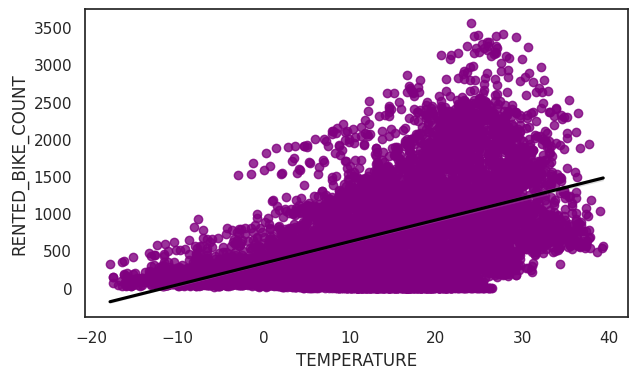

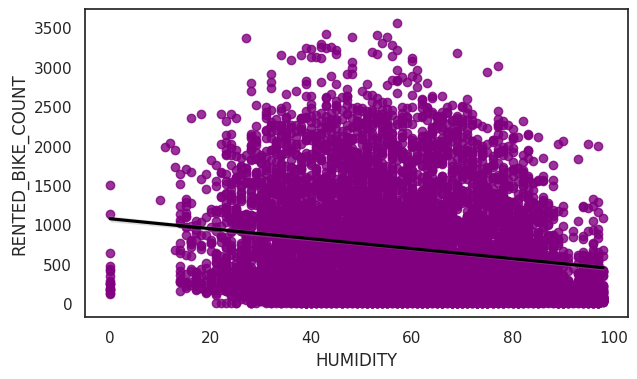

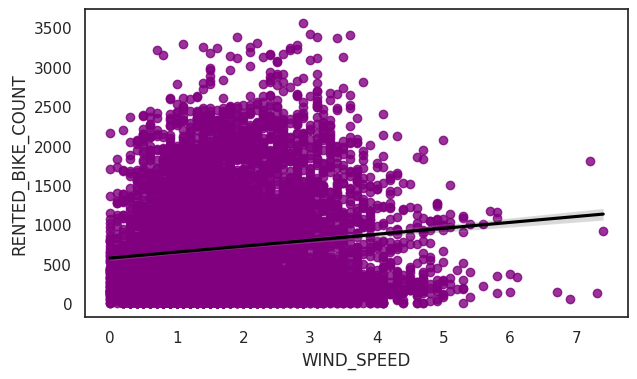

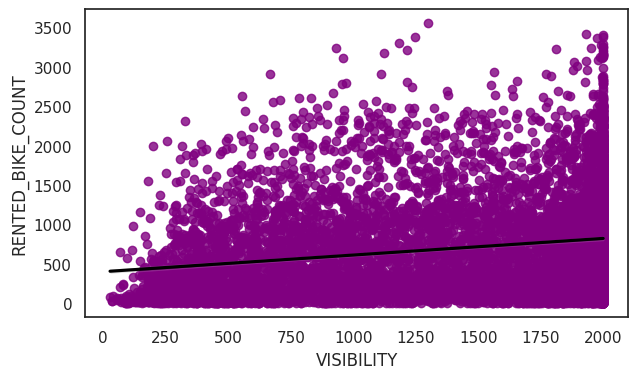

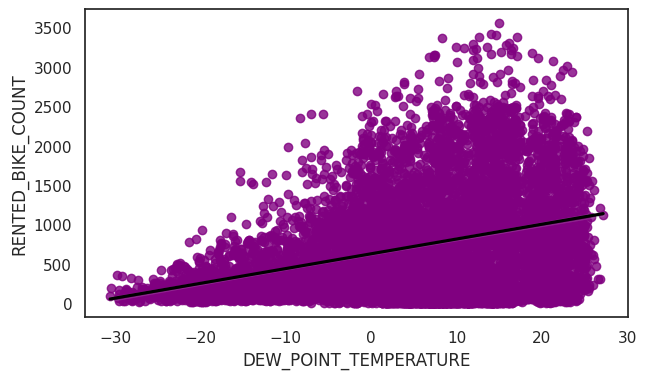

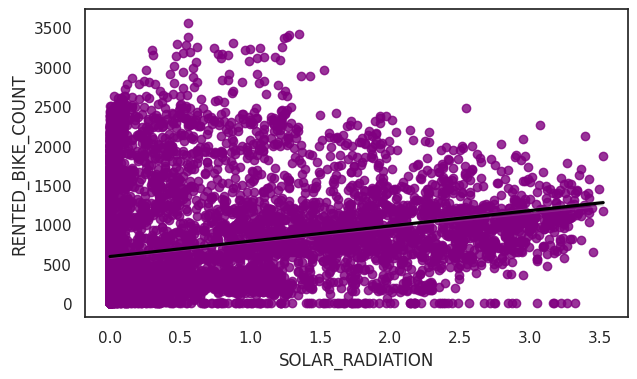

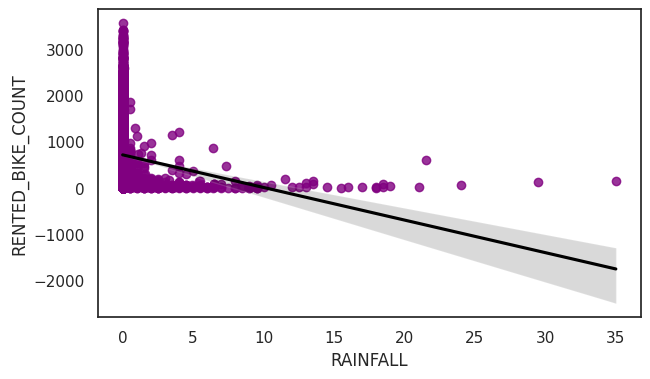

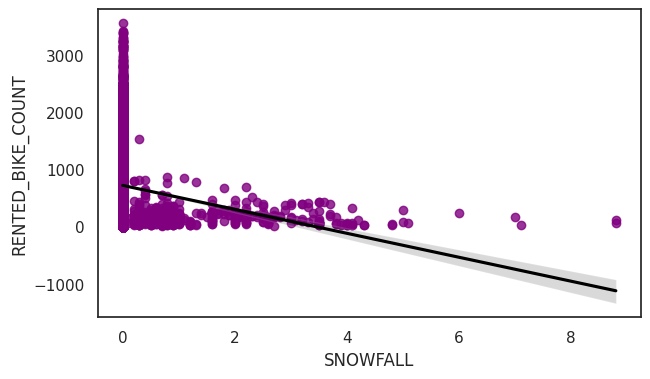

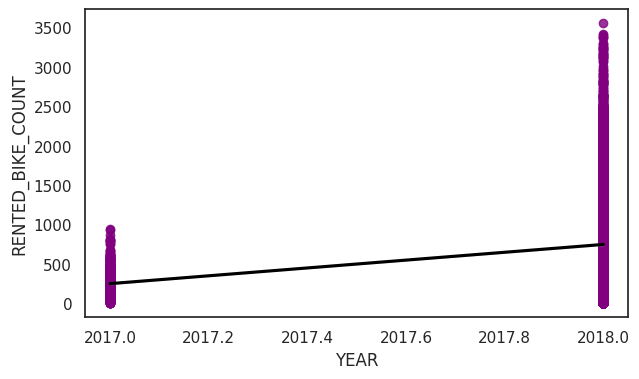

In [155]:
# Printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(7,4))
  sns.regplot(x=df[col],y=df['RENTED_BIKE_COUNT'],scatter_kws={"color": 'purple'}, line_kws={"color": "black"})


### ◼ Regression plot of numerical feature 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation 'are bike count increses with these features.

### ◼ 'Rainfall' ,'Snowfall', and 'Humidity'. These features are negatively related to the rented bike count, which means the rented bike count decreases when these features increase.

# **⬛ Data Preparation for Regression Model**

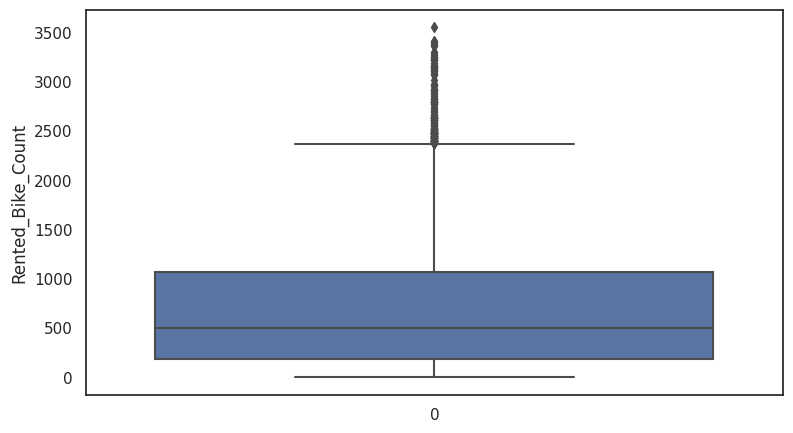

In [156]:
# Check outliers for Dependent variable 
plt.figure(figsize=(9,5)) 
sns.boxplot(df['RENTED_BIKE_COUNT'])
plt.ylabel('Rented_Bike_Count')
plt.show()

### ◼  The above boxplot shows that  dependent variable column contains outliers.

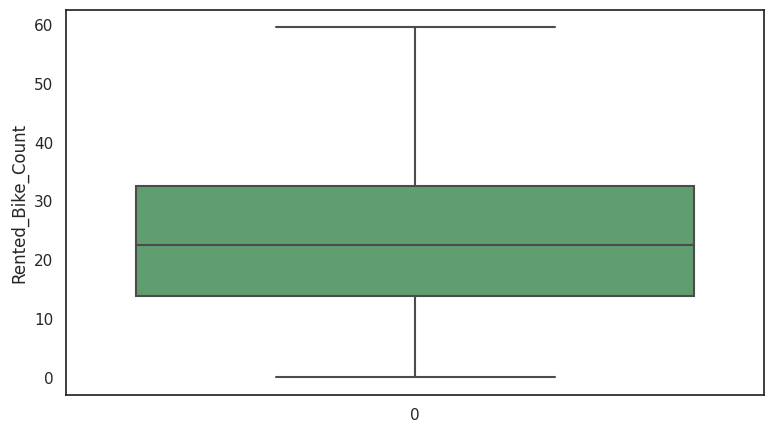

In [157]:
# Removing  outliers from the Dependent variable 
plt.figure(figsize=(9,5))
sns.boxplot(np.sqrt(df['RENTED_BIKE_COUNT']),color='g')
plt.ylabel('Rented_Bike_Count')
plt.show()

### ◼ From the above boxplot we can see that we have removed the outliers present in the dependent variable column.


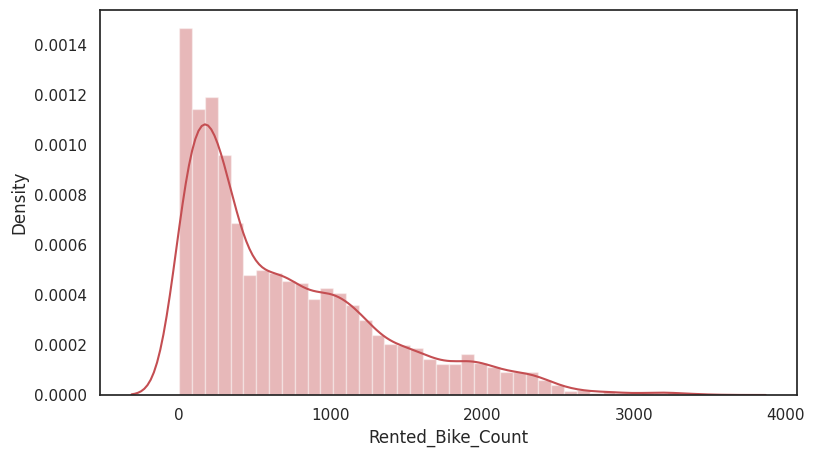

In [158]:
# Check Distribution for  Dependent variable
plt.figure(figsize=(9,5))
sns.distplot(df['RENTED_BIKE_COUNT'],hist=True , color='r')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
plt.show()


### ◼  The above boxplot shows that  dependent variable column contains outliers. The above graph show that the dependent variable has moderate right skewness. Since the assumption is that the dependent variable has to be normal. So we have to perform some operation to make the above plot normal with the help of normalization.

Text(0, 0.5, 'Density')

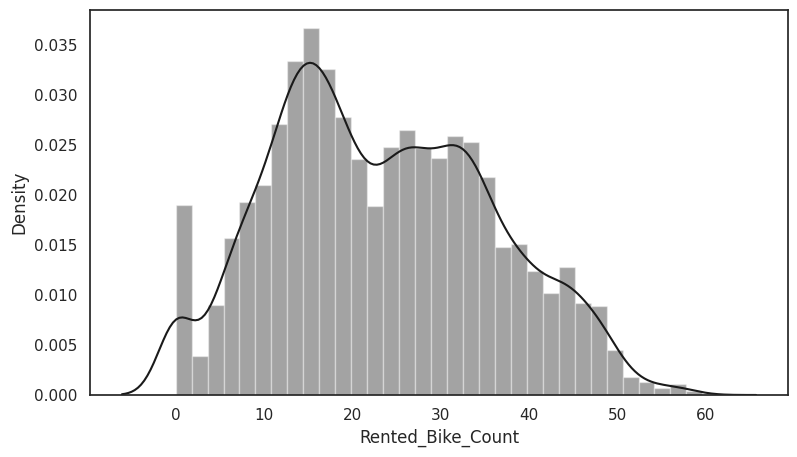

In [159]:
# Applyng Normalization for Rented_Bike_Count to improve the skewness 
plt.figure(figsize=(9,5))
sns.distplot(np.sqrt(df['RENTED_BIKE_COUNT']),color='k')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

### ◼ Since after applying Square root for right Skewness to make it normal, here we get almost normal distribution curve.

In [160]:
# Check Multicollinearity for Independent Variables
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df[[i for i in df.describe().columns if i not in ['RENTED_BIKE_COUNT']]])


,variables,VIF
0,TEMPERATURE,187.482103
1,HUMIDITY,186.517131
2,WIND_SPEED,4.533706
3,VISIBILITY,10.235595
4,DEW_POINT_TEMPERATURE,126.711067
5,SOLAR_RADIATION,2.832598
6,RAINFALL,1.100442
7,SNOWFALL,1.125229
8,YEAR,394.869086


In [161]:
# Remove variables with high VIF
df1 = df.drop(['HUMIDITY', 'YEAR','DEW_POINT_TEMPERATURE','VISIBILITY'], axis=1)

In [162]:
# Check the head of the dataset
df1.head()

,DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,WIND_SPEED,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY,MONTH,DAY,WEEKDAYS_WEEKEND
0,2017-12-01,254,0,-5.2,2.2,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,0
1,2017-12-01,204,1,-5.5,0.8,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,0
2,2017-12-01,173,2,-6.0,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,0
3,2017-12-01,107,3,-6.2,0.9,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,0
4,2017-12-01,78,4,-6.0,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,0


# **⬛ Label Encoding**

### A dataset may contain various types of values; sometimes it consists of categorical values. So, in order to use those categorical values for programming efficiently, we create dummy variables.
### Furthermore, many machine learning algorithms cannot work directly with categorical data. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [163]:
# View all categorical columns
cate_feature=df1.select_dtypes(include=['category','object']).columns
cate_feature


Index(['HOUR', 'SEASONS', 'HOLIDAY', 'FUNCTIONING_DAY', 'MONTH', 'DAY',
       'WEEKDAYS_WEEKEND'],
      dtype='object')

In [164]:
# Encoding for Seasons column
df1_copy=df1.copy()

df1_copy['Winter'] = np.where(df1_copy['SEASONS']=='Winter', 1, 0)
df1_copy['Spring'] = np.where(df1_copy['SEASONS']=='Spring', 1, 0)
df1_copy['Summer'] = np.where(df1_copy['SEASONS']=='Summer', 1, 0)
df1_copy['Autumn'] = np.where(df1_copy['SEASONS']=='Autumn', 1, 0)

df1_copy.drop(columns=['SEASONS'],axis=1,inplace=True)

# Encoding for Holiday column

df1_copy['HOLIDAY'] = np.where(df1_copy['HOLIDAY']=='HOLIDAY',1,0)

# Encoding for Functioning day

df1_copy['FUNCTIONING_DAY'] = np.where(df1_copy['FUNCTIONING_DAY']=='Yes',1,0)

# Encoding for weekdays and weekend

df1_copy['WEEKDAYS'] = np.where(df1_copy['WEEKDAYS_WEEKEND']==0, 1, 0)
df1_copy['WEEKEND'] = np.where(df1_copy['WEEKDAYS_WEEKEND']==1, 1, 0)

df1_copy.drop(columns=['WEEKDAYS_WEEKEND'],axis=1,inplace=True)



In [165]:
# Encoding for HOUR column
# One Hot Encoding

HOUR_onehot = pd.get_dummies(df1_copy['HOUR'], prefix='HOUR')

# drop the original features
df1_copy.drop('HOUR', axis=1, inplace=True)

# concatenate the one-hot encoded hour feature with the rest of the data
df1_copy = pd.concat([df1_copy, HOUR_onehot], axis=1)

In [166]:
# Encoding for DAY column
# One Hot Encoding

HOUR_onehot = pd.get_dummies(df1_copy['DAY'], prefix='DAY')

# drop the original features
df1_copy.drop('DAY', axis=1, inplace=True)

# concatenate the one-hot encoded hour feature with the rest of the data
df1_copy = pd.concat([df1_copy, HOUR_onehot], axis=1)

In [167]:
# Encoding for MONTH column
# One Hot Encoding

HOUR_onehot = pd.get_dummies(df1_copy['MONTH'], prefix='MONTH')

# drop the original features
df1_copy.drop('MONTH', axis=1, inplace=True)

# concatenate the one-hot encoded hour feature with the rest of the data
df1_copy = pd.concat([df1_copy, HOUR_onehot], axis=1)

In [168]:
# Drop DATE column
df1_copy = df1_copy.drop(['DATE'], axis=1,)

In [169]:
# Check the head of the dataset
df1_copy.head()

,RENTED_BIKE_COUNT,TEMPERATURE,WIND_SPEED,SOLAR_RADIATION,RAINFALL,SNOWFALL,HOLIDAY,FUNCTIONING_DAY,Winter,Spring,...,MONTH_December,MONTH_February,MONTH_January,MONTH_July,MONTH_June,MONTH_March,MONTH_May,MONTH_November,MONTH_October,MONTH_September
0,254,-5.2,2.2,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,204,-5.5,0.8,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,173,-6.0,1.0,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,107,-6.2,0.9,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,78,-6.0,2.3,0.0,0.0,0.0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


# **⬛ Model Training and Implementation**

In [170]:
# Create Independent And Dependent Variables
X=df1_copy.drop(['RENTED_BIKE_COUNT'],axis=1)
Y=np.sqrt(df1_copy['RENTED_BIKE_COUNT'])

In [171]:
# Splitting the dataset into the Training set and Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 56)
(2190, 56)


In [172]:
# Decribe the columns of dataset
X.describe().columns

Index(['TEMPERATURE', 'WIND_SPEED', 'SOLAR_RADIATION', 'RAINFALL', 'SNOWFALL',
       'HOLIDAY', 'FUNCTIONING_DAY', 'Winter', 'Spring', 'Summer', 'Autumn',
       'WEEKDAYS', 'WEEKEND', 'HOUR_0', 'HOUR_1', 'HOUR_2', 'HOUR_3', 'HOUR_4',
       'HOUR_5', 'HOUR_6', 'HOUR_7', 'HOUR_8', 'HOUR_9', 'HOUR_10', 'HOUR_11',
       'HOUR_12', 'HOUR_13', 'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_17',
       'HOUR_18', 'HOUR_19', 'HOUR_20', 'HOUR_21', 'HOUR_22', 'HOUR_23',
       'DAY_Friday', 'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday',
       'DAY_Thursday', 'DAY_Tuesday', 'DAY_Wednesday', 'MONTH_April',
       'MONTH_August', 'MONTH_December', 'MONTH_February', 'MONTH_January',
       'MONTH_July', 'MONTH_June', 'MONTH_March', 'MONTH_May',
       'MONTH_November', 'MONTH_October', 'MONTH_September'],
      dtype='object')

In [173]:
# Transforming  dataset
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# **⚫ LINEAR REGRESSION**

### Linear Regression is a supervised machine learning algorithm used for regression problems. It is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. The algorithm estimates the coefficients of the independent variables and predicts the dependent variable based on a linear combination of the independent variables. The goal of linear regression is to find the line of best fit that minimizes the sum of squared residuals between the predicted values and actual values. Linear regression is simple and easy to implement, making it a popular choice for solving regression problems.

In [174]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train,Y_train) 

LinearRegression()

In [175]:
# Traning Data Score
regressor.score(X_train,Y_train)

0.7406035767172927

In [176]:
# Testing Data Score
regressor.score(X_test,Y_test)

0.7625191054757681

In [177]:
# Checking  intrecept
regressor.intercept_


2568602389791.15

In [178]:
# Checking cofficient 
regressor.coef_


array([ 2.22884914e+01,  8.15128360e-01,  1.05541913e+01, -6.67023809e+01,
       -9.75863200e+00, -5.39933568e+11,  2.86382962e+01, -4.56195869e+12,
        4.85227841e+11, -9.64592652e+12, -1.90036748e+12,  2.40585272e+12,
       -1.26363394e+12,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11,  9.71248855e+11,  9.71248855e+11,  9.71248855e+11,
        9.71248855e+11, -1.84714848e+12, -1.84714848e+12,  1.82233818e+12,
        1.82233818e+12, -1.84714848e+12, -1.84714848e+12, -1.84714848e+12,
       -4.58378333e+12,  5.54737103e+12,  4.63403203e+11,  4.63403203e+11,
        4.63403203e+11,  5.54737103e+12,  5.54737103e+12, -4.58378333e+12,
       -4.58378333e+12, -

In [179]:
# Predicting train and and test set values for dependent variable(Y)
Y_pred_train=regressor.predict(X_train)
Y_pred_test=regressor.predict(X_test)

## **▶ Evaluation on Training Dataset**

In [180]:
# Calculate the values of training dataset

# calculate MSE
MSE_lr= mean_squared_error((Y_train**2), (Y_pred_train**2))
print("MSE :",MSE_lr)

# calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# calculate MAE
MAE_lr= mean_absolute_error(Y_train**2, Y_pred_train**2)
print("MAE :",MAE_lr)

# calculate r2 and adjusted r2
r2_lr= r2_score(Y_train**2, Y_pred_train**2)
print("R2 :",r2_lr)

Adjusted_R2_lr = (1-(1-r2_score(Y_train**2, Y_pred_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 115296.67749747461
RMSE : 339.55364450624677
MAE : 231.17548390058985
R2 : 0.7225468322674562
Adjusted R2 : 0.7152625484451297


In [181]:
# Storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

## **▶ Evaluation on Testing Dataset**

In [182]:
# Calculate the values of testing dataset

# calculate MSE
MSE_lr= mean_squared_error(Y_test**2, Y_pred_test**2)
print("MSE :",MSE_lr)

# calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

# calculate MAE
MAE_lr= mean_absolute_error(Y_test**2, Y_pred_test**2)
print("MAE :",MAE_lr)

# calculate r2 and adjusted r2
r2_lr= r2_score((Y_test**2), (Y_pred_test**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((Y_test**2), (Y_pred_test**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 109540.14795267012
RMSE : 330.96849994020596
MAE : 224.1643410960289
R2 : 0.7373829090298958
Adjusted R2 : 0.7304881330831889


In [183]:
# Storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

### ▶ **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

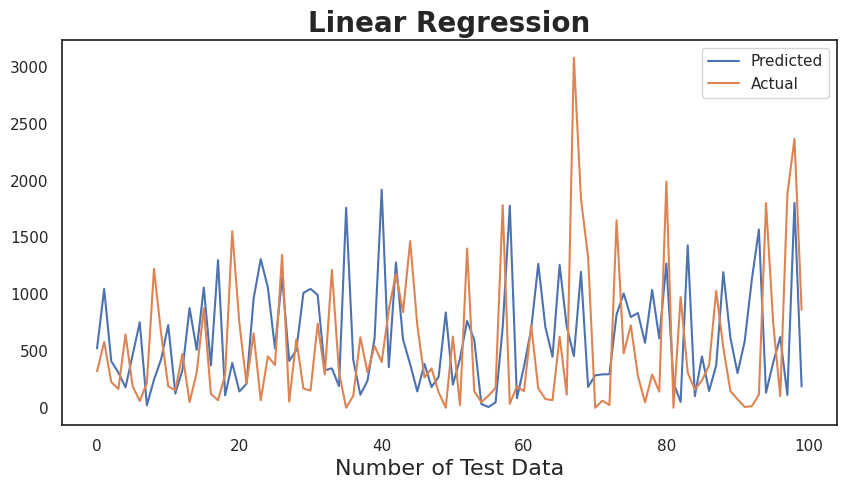

In [184]:
# Plot figure for Actual and Predicted test value
plt.figure(figsize=(10,5))
plt.plot((Y_pred_train**2)[:100])
plt.plot((np.array(Y_test**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('Number of Test Data', fontsize=16)
plt.title('Linear Regression',fontsize= 20, fontweight='bold')
plt.show()

### ◼ The R2 score for the test data is 0.73 and training data is 0.72, that means our linear regression model is performing well on the dataset. The evaluation metrics suggest that the Linear Regression model used provides a good fit to the data. 

# **⚫ LASSO REGRESSION**

### Lasso Regression is a type of regularization technique in linear regression which uses L1 regularization to add constraint to the model to avoid overfitting. In Lasso regression, some of the coefficients become zero which leads to variable selection and reduced complexity of the model and Lasso regression analysis is a shrinkage and variable selection method for linear regression models.


In [185]:
# Fitting the Lasso Regression
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [186]:
# The lasso training and testing score
print(lasso.score(X_train, Y_train))

print(lasso.score(X_test, Y_test))

0.7406091500678282
0.7625477239104094


### ▶  **Cross- Validation & Hyperparameter Tuning**

In [187]:
# Performing the hyperparameter tuning and cross validtation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='r2')

In [188]:
# Printing the best params and best score
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.0001}
The R2 score using the same alpha is : 0.7355268520744069


In [189]:
# Predict train and test value using Lasso
Y_pred_lasso_train = lasso_regressor.predict(X_train)
Y_pred_lasso_test = lasso_regressor.predict(X_test)

## **▶ Evaluation on Training Dataset**

In [190]:
# Calculate the  values of training dataset

# calculate MSE
MSE_lasso= mean_squared_error((Y_train**2), (Y_pred_lasso_train**2))
print("MSE :",MSE_lasso)

# calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

# calculate MAE
MAE_lasso= mean_absolute_error(Y_train**2, Y_pred_lasso_train**2)
print("MAE :",MAE_lasso)

# calculate r2 and adjusted r2
r2_lasso= r2_score(Y_train**2, Y_pred_lasso_train**2)
print("R2 :",r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score(Y_train**2, Y_pred_lasso_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso )

MSE : 115299.68105702364
RMSE : 339.55806728308437
MAE : 231.17217632166287
R2 : 0.7225396044172749
Adjusted R2 : 0.7152551308342311


In [191]:
# Storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

## **▶ Evaluation on Testing Dataset**

In [192]:
# Calculate the values of testing dataset

#calculate MSE
MSE_lasso= mean_squared_error((Y_test**2), (Y_pred_lasso_test**2))
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#calculate MAE
MAE_lasso= mean_absolute_error(Y_test**2, Y_pred_lasso_test**2)
print("MAE :",MAE_lasso)

#calculate r2 and adjusted r2
r2_lasso= r2_score(Y_test**2, Y_pred_lasso_test**2)
print("R2 :",r2_lasso)

Adjusted_R2_lasso = (1-(1-r2_score(Y_test**2, Y_pred_lasso_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso )

MSE : 109537.2359939394
RMSE : 330.9641007631181
MAE : 224.13008285865223
R2 : 0.7373898903070365
Adjusted R2 : 0.7304952976474932


In [193]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

### ▶ **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

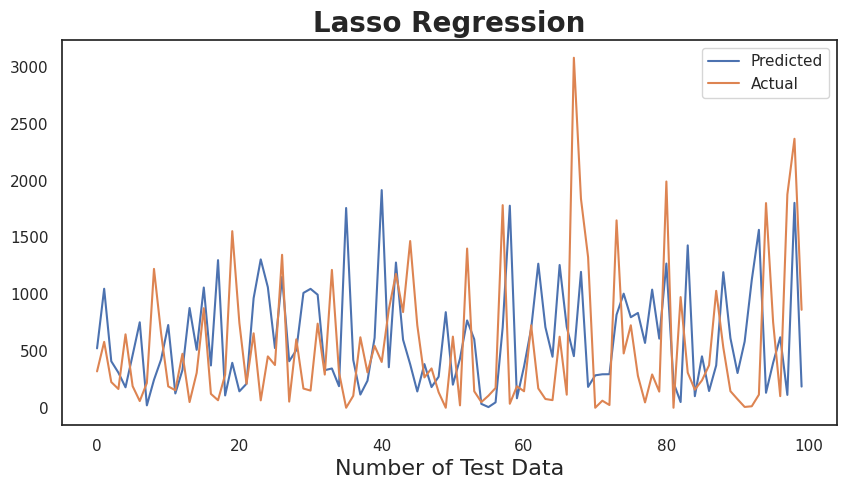

In [194]:
# Plot figure for Actual and Predicted test value
plt.figure(figsize=(10,5))
plt.plot((Y_pred_lasso_train**2)[:100])
plt.plot((np.array(Y_test**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('Number of Test Data', fontsize=16)
plt.title('Lasso Regression',fontsize= 20, fontweight='bold')
plt.show()

### ◼ Evaluation metrics in lasso regression give us a clear indication of how well our model is performing in predicting the target variables. The R2 score on training dataset is 0.72 and on testing dataset is 0.73 That means our lasso regression model is accurately predicting the target variable. This would translate to better decision-making and improved business outcomes and the best set of hyperparameters is then used to train the final model.

### ▶ **Which hyperparameter optimization technique have you used and why?**
### GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. In GridSearchCV, along with Grid Search cross-validation is also performed and Cross-Validation is used while training the model. Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

### **▶ Have you seen any improvement?**
### No, By compairing to the linear regresssion model , lasso regression model does not improve because R2 score is same for both the model

# **⚫ DECISION TREE REGRESSION**

### A decision tree regression is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. A decision tree regression is a very specific type of probability tree that enables you to make a decision about some kind of process.

In [195]:
# Fitting decision tree regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [196]:
# The decision tree training and testing score
print(dtr.score(X_train, Y_train))

print(dtr.score(X_test, Y_test))

0.9999980924053475
0.8573216103201131


### ▶ **Cross- Validation & Hyperparameter Tuning**

In [197]:
# Hyperparameters Tuining values

# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [20,30,40,50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [60,70,80,90]


param_dict = {'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [198]:
# Performing Cross Validtation
dtr_grid = GridSearchCV(estimator=dtr, param_grid = param_dict, cv = 5,scoring='r2')

dtr_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [60, 70, 80, 90],
                         'min_samples_split': [20, 30, 40, 50]},
             scoring='r2')

In [199]:
# Printing the best params and best score
print('The best parameters values is found out to be :' ,dtr_grid.best_params_)
print('The R2 score using the same parameters values is :', dtr_grid.best_score_)

The best parameters values is found out to be : {'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 30}
The R2 score using the same parameters values is : 0.7246312489936796


In [200]:
#  predict train and test value using decision tree
Y_pred_dtr_train=dtr_grid.predict(X_train)
Y_pred_dtr_test = dtr_grid.predict(X_test)

## **▶ Evaluation on Training Dataset**

In [201]:
# Calculate the values of training dataset

# calculate MSE
MSE_dtr= mean_squared_error((Y_train**2), (Y_pred_dtr_train**2))
print("MSE :",MSE_dtr)

# calculate RMSE
RMSE_dtr=np.sqrt(MSE_dtr)
print("RMSE :",RMSE_dtr)

# calculate MAE
MAE_dtr= mean_absolute_error(Y_train**2, Y_pred_dtr_train**2)
print("MAE :",MAE_dtr)

#calculate r2 and adjusted r2
r2_dtr= r2_score(Y_train**2, Y_pred_dtr_train**2)
print("R2 :",r2_dtr)

Adjusted_R2_dtr = (1-(1-r2_score(Y_train**2, Y_pred_dtr_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dtr )

MSE : 110580.45009616969
RMSE : 332.53638913082835
MAE : 218.9863336731666
R2 : 0.7338960945414514
Adjusted R2 : 0.7269097754108004


In [202]:
# Storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Decision Tree ',
       'MAE':round((MAE_dtr),3),
       'MSE':round((MSE_dtr),3),
       'RMSE':round((RMSE_dtr),3),
       'R2_score':round((r2_dtr),3),
       'Adjusted R2':round((Adjusted_R2_dtr ),2)}
training_df=training_df.append(dict1,ignore_index=True)

## ▶ **Evaluation on Testing Dataset**

In [203]:
# Calculate the values of testing dataset

#calculate MSE
MSE_dtr= mean_squared_error((Y_test**2), (Y_pred_dtr_test**2))
print("MSE :",MSE_dtr)

#calculate RMSE
RMSE_dtr=np.sqrt(MSE_dtr)
print("RMSE :",RMSE_dtr)

#calculate MAE
MAE_dtr= mean_absolute_error(Y_test**2, Y_pred_dtr_test**2)
print("MAE :",MAE_dtr)

#calculate r2 and adjusted r2
r2_dtr= r2_score(Y_test**2, Y_pred_dtr_test**2)
print("R2 :",r2_dtr)

Adjusted_R2_dtr = (1-(1-r2_score(Y_test**2, Y_pred_dtr_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dtr )

MSE : 120581.80919798039
RMSE : 347.24891533017114
MAE : 223.20103140780782
R2 : 0.7109110719006122
Adjusted R2 : 0.7033213016363995


In [204]:
# Storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision Tree ',
       'MAE':round((MAE_dtr),3),
       'MSE':round((MSE_dtr),3),
       'RMSE':round((RMSE_dtr),3),
       'R2_score':round((r2_dtr),3),
       'Adjusted R2':round((Adjusted_R2_dtr ),2)}
test_df=test_df.append(dict2,ignore_index=True)

### ▶ **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

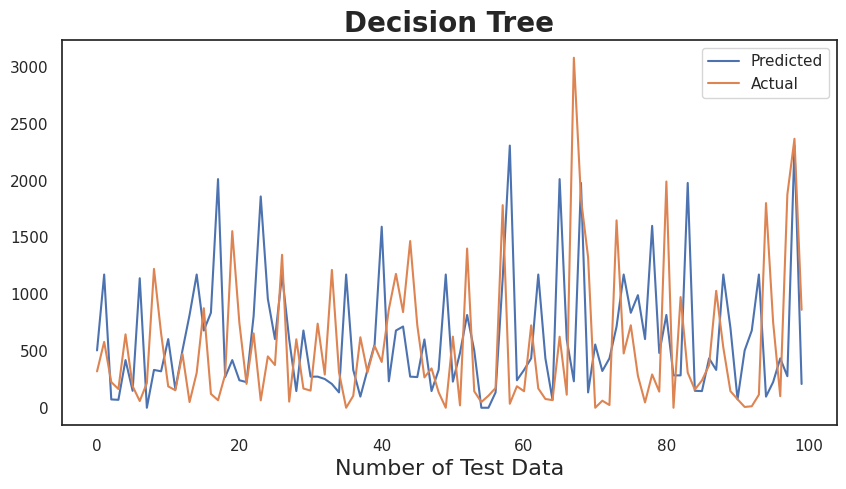

In [205]:
# Plot figure for Actual and Predicted test value
plt.figure(figsize=(10,5))
plt.plot((Y_pred_dtr_train**2)[:100])
plt.plot((np.array(Y_test**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('Number of Test Data', fontsize=16)
plt.title('Decision Tree',fontsize= 20, fontweight='bold')
plt.show()

### ◼ The evaluation metrics for the Decision Tree Regression training data show a good fit with an R2 score of 0.73 and  testing  R2 score of 0.71 that means our decision tree regression model is performing well on the dataset.

 

### ▶ **Which hyperparameter optimization technique have you used and why?**
### GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. In GridSearchCV, along with Grid Search cross-validation is also performed and cross-Validation is used while training the model. Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

### **▶ Have you seen any improvement?**
### No, By compairing to then both linear regresssion model and lasso regression, decision tree model does not improve.


## ▶ **Feature Importances**

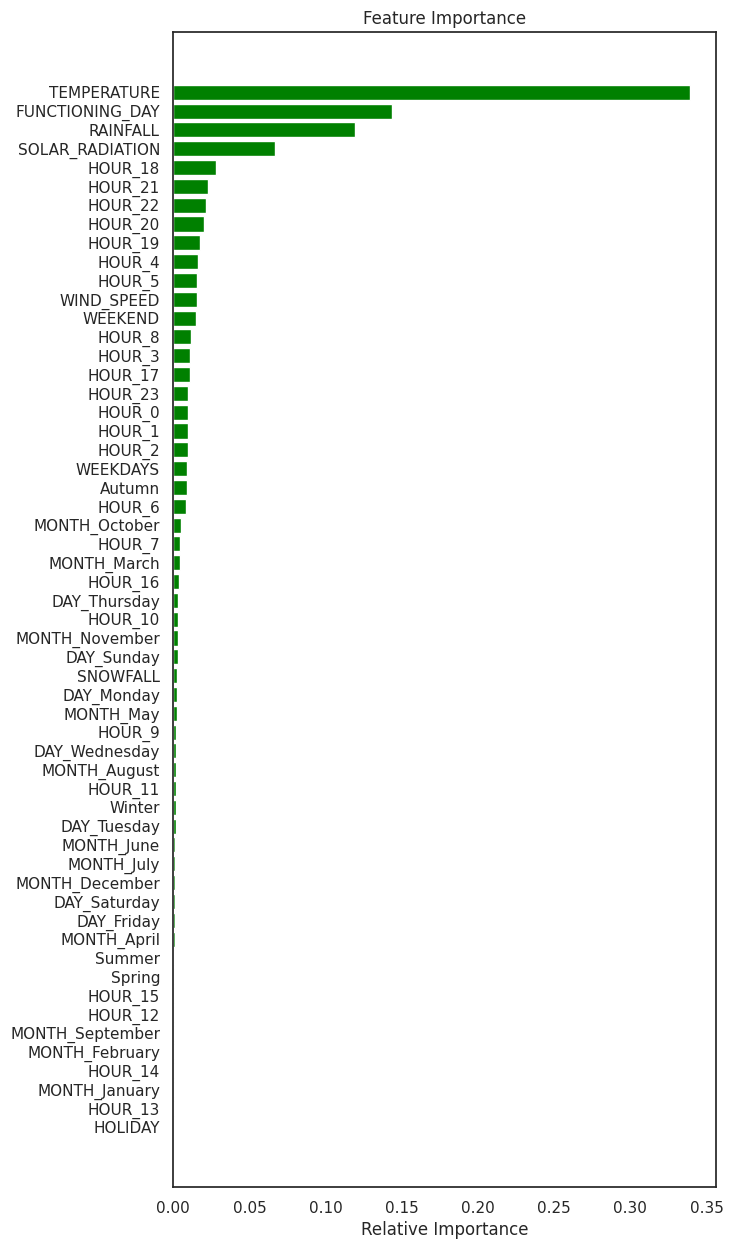

In [206]:
# Important columns according to decision tree
features = X.describe().columns
importances = dtr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **⚫ RANDOM FOREST REGRESSION**

### Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.The Random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.

In [207]:
# Fitting Random forest regression
# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor()

# Fitting the model
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [208]:
# The random forest training and testing score
print(rf.score(X_train, Y_train))

print(rf.score(X_test, Y_test))

0.9882328193012406
0.9227305718113489


### **▶ Cross- Validation & Hyperparameter Tuning**

In [209]:
# Providing the range of values for the hyperparameter tuining
n_estimators=[75,100,125,150]

# Max Depth of the tree
max_depth=[3,7,5,9]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90, 110]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50,60]   # To avoid the overfitting of data

# Hyperparameter Grip
grid_values={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [210]:
# Performing Cross Validtation
rf_grid = GridSearchCV(estimator=rf, param_grid = grid_values, cv = 5,scoring='r2')

rf_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 7, 5, 9],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 70, 90, 110],
                         'n_estimators': [75, 100, 125, 150]},
             scoring='r2')

In [211]:
# Printing the best params and best score
print('The best parameters values is found out to be :' ,rf_grid.best_params_)
print('The R2 score using the same parameters values is :', rf_grid.best_score_)

The best parameters values is found out to be : {'max_depth': 9, 'min_samples_leaf': 40, 'min_samples_split': 70, 'n_estimators': 100}
The R2 score using the same parameters values is : 0.7780559401770919


In [212]:
# Predict train and test value using random forest

Y_pred_rf_train=rf_grid.predict(X_train)
Y_pred_rf_test = rf_grid.predict(X_test)

## **▶ Evaluation on Training Dataset**

In [213]:
# Caluculate the values of training dataset

#calculate MSE
MSE_rf= mean_squared_error((Y_train**2), (Y_pred_rf_train**2))
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate MAE
MAE_rf= mean_absolute_error(Y_train**2, Y_pred_rf_train**2)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(Y_train**2, Y_pred_rf_train**2)
print("R2 :",r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(Y_train**2, Y_pred_rf_train**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

MSE : 105756.56565401422
RMSE : 325.2023457080441
MAE : 214.38260612882422
R2 : 0.7455044257466683
Adjusted R2 : 0.7388228729298907


In [214]:
# Storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forest ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

## ▶ **Evaluation on Testing Dataset**

In [215]:
# Calculate the values of testing dataset

#calculate MSE
MSE_rf= mean_squared_error((Y_test**2), (Y_pred_rf_test**2))
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculate MAE
MAE_rf= mean_absolute_error(Y_test**2, Y_pred_rf_test**2)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(Y_test**2, Y_pred_rf_test**2)
print("R2 :",r2_rf)

Adjusted_R2_rf = (1-(1-r2_score(Y_test**2, Y_pred_rf_test**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

MSE : 108665.13988498665
RMSE : 329.64395927270783
MAE : 215.36342918409616
R2 : 0.739480697627093
Adjusted R2 : 0.7326409972366181


In [216]:
# Storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random Forest ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

### **▶ Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

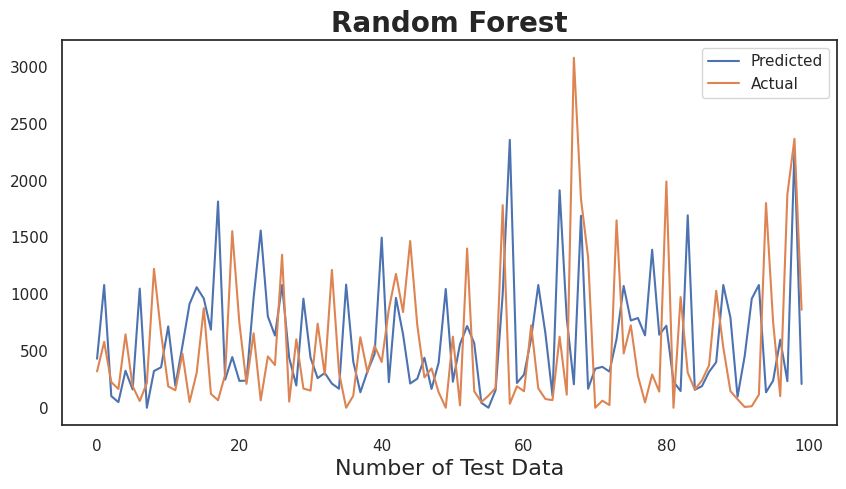

In [217]:
# Plot figure for Actual and Predicted test value
plt.figure(figsize=(10,5))
plt.plot((Y_pred_rf_train**2)[:100])
plt.plot((np.array(Y_test**2)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('Number of Test Data', fontsize=16)
plt.title('Random Forest',fontsize= 20, fontweight='bold')
plt.show()

### ◼ The evaluation metrics for the Random Forest Regression training data shows that the Random Forest Regression model has a high accuracy. The R2 value of   0.74 on testing data and  0.75 on training data that means our Random forest regression model is performing well on the dataset. The most crucial feature taken into account when utilising a random forest to make predictions is temperature this means our Random forest model is performing well on the data and has more accuracy among all the models. Out of the five models, Random Forest performs the best because it gives nearly all of the features a significant impact power.



### **▶  Which hyperparameter optimization technique have you used and why?**
### GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. In GridSearchCV, along with Grid Search cross-validation is also performed and cross-Validation is used while training the model. Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

### **▶  Have you seen any improvement?**
### Yes, Random forest regression model is improve and give the best result compaire to the other models. 



## ▶ **Feature Importances**

Text(0.5, 0, 'Relative Importance')

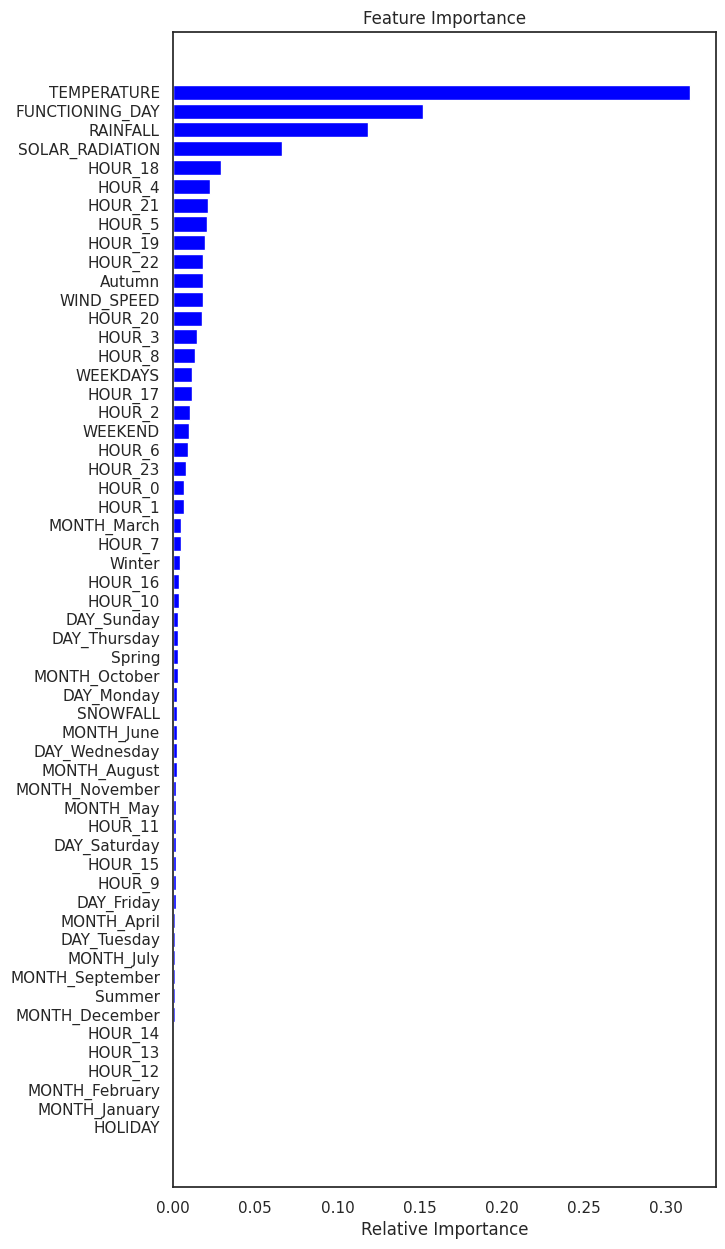

In [218]:
# Important columns according random forest
features = X.describe().columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

### **▶ Which Evaluation metrics did you consider for a positive business impact and why?**
### The evalaution metrics we would like to go with the R2 score and it is one of the performance evaluation measures for regression-based machine learning models. A positive business impact of using the R2-score metric is that it helps identify the most effective predictors in the model and reduces the risk of overfitting. This leads to  more accurate prediction of bike sharing demand, which can help optimize the bike sharing service and improve its financial performance and maximize its profit.

### **▶  Which ML model did you choose from the above created models as your final prediction model and why?**
### Based on the evaluation results, the Random Forest Regression model with hyperparameter tuning is the best prediction model, because it has the highest score in terms of R2 score for the training and testing dataset and this suggests that these models are equally good at predicting the target variable.


# ⬛ **Comparing results of all the models**

In [219]:
# Displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model      MAE         MSE     RMSE  R2_score  \
Training set 0  Linear regression   231.175  115296.677  339.554     0.723   
             1   Lasso regression   231.172  115299.681  339.558     0.723   
             2      Decision Tree   218.986  110580.450  332.536     0.734   
             3      Random Forest   214.383  105756.566  325.202     0.746   
Test set     0  Linear regression   224.164  109540.148  330.968     0.737   
             1   Lasso regression   224.130  109537.236  330.964     0.737   
             2      Decision Tree   223.201  120581.809  347.249     0.711   
             3      Random Forest   215.363  108665.140  329.644     0.739   

                Adjusted R2  
Training set 0         0.72  
             1         0.72  
             2         0.73  
             3         0.74  
Test set     0         0.73  
             1         0.73  
             2         0.70  
             3         0.73

# **⬛ Project Summary**
### A Machine Learning regression predictive model for bike sharing demand. A bike-sharing system provides people with a sustainable mode of transportation and has beneficial effects for both the environment and the user. In recent days, Public rental bike sharing is becoming popular because of its increased comfortableness and environmental sustainability. Data used in this prediction model is Seoul Bike data. 
### For analysis of the whole dataset we are Loading Dataset and Importing libraries , further going on understand more about the data and doing some analysis process on it and for this we are moving to " Data Wrangling & Feature Engineering process " on the dataset and after that as we know we have 8760 observations and 14 features in our dataset i.e Categorical data and also have Numerical data. For further process We renamed the columns because they have units mentioned in brackets and it was difficult to copy the feature name while working on dataset. Moving forward for working on dataset we have to clean our data first and we found that we have zero null values in our dataset and zero duplicate entries are found. we also Created two new columns with the help of 'Date','Month' and 'Day'. Which were further used for EDA and later we dropped Date column.

### Further going toward Data visualization process for that we have to analysed our data on the basis of univariate , bivariate and multivariate statistics features to grab the details about the every column of our dataset. Using these three statistics features we visualize the dataset and trying to find out exact output on it and for this we use the all columns comparison and plot the different type of visualization graph ,chart etc. We also find out the correlations between them. Now the process forward on model processing so first we check the outlier of the and data remove the outlier present in the dataset. On our datset we plot the regression and find the best fit line over there moving on we reach the process of model traing and implimentation. Further on we prepare our data for regressions model  and for that we encoding the lable on required columns of the dataset. then apply the various regressions model on dataset which are fit on the data and processing over it we change the column as per need like select rented bike count column into depended variable and other columns select into independend variable and splitting the dataset into the Training set and Testing set and evaluate both the training and testing data. Model Selection and Evaluation the dataset as this is the regression problem we are trying to predict continuous value. For this we used following regression models Linear Regression , Lasso Regression,Decision Tree Regression ,  Random forest Regression and  we observe that each model gives the features a different level of importance or impact power, and this determines how well the model predicts.






.







# **⬛ Conclusion** 
### ◼ We have finally reached our conclusion which is helpful for growing bike rented market through our analyzation we find the some nearby data which used to reference for future growth as well as develop bike rented business as per customer need and their expectation.

### ◼ In overall process the  transportation market bike sector growing rapidly and it also impact positively on people and their health. 

### ◼ The analysis of bike sharing demand prediction shows that there is a clear seasonality in the bike rental demand with the highest demand seen in the months from May to July and the lowest in December.

### ◼ Monday to Friday the demand for rented bike high at the morning at 7am to 9am and in the evening high demand for rented bike is at 5pm to 9pm, which means People prefer to rent bike in these period.

### ◼ Summer Season is the peak season where most people hired a bike and there is a lot of demand for bikes in summer season than compare to other seasons and the number of bike rentals increased year from 2017 to 2018.

### ◼ We used different types of regression algorithms to train our model, like Linear regression, Lasso regression, Decision tree, Random forest regression, where we tunned the parameters of the decision tree and  Out Of them random forest regression gave the best result.

### ◼ Linear regression, Lasso regression, have  same result in both the training and testing dataset but the Random forest regression model is perform excellent on the dataset.

### The dataset contains immense possibility to improve business values and have positive impact. It is not limited to the problem taken into the consideration for this project.



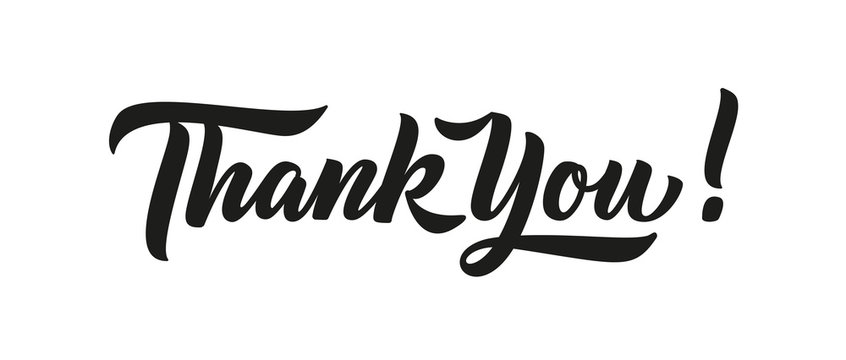